## **Trader Behaviour Insights**

## Assignment Overview

Two primary datasets:
1. Bitcoin Market Sentiment Dataset
- Columns: Date, Classification (Fear/Greed)
2. Historical Trader Data from Hyperliquid
- Columns include: account, symbol, execution price, size, side, time,start position, event, closedPnL, leverage

## Business Objective
To explore the relationship between trader performance and market
sentiment, uncover hidden patterns, and deliver insights that can drive smarter trading
strategies.




## Assignment Tasks
Performed the following steps for successfully completing this assignment:
1. Data Preparation
2. EDA
3. Volume Vs Sentiments
4. Sentiments<br>
   a.Traders making bigger trades in “Greed” vs “Fear”<BR>
   b.traders making bigger trades in “Greed” vs “Fear”
5. Traders vs. Sentiments
6. Advance Trade Metrics
7. Correlation Analysis
8. Trader Rankings

## **1. Data Preparation**


### **1.1 Librariers**

In [84]:
# Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [85]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### **1.1 Load the Data**

In [86]:
trader_df=pd.read_csv("/content/historical_data.csv")
sentiment_df=pd.read_csv("/content/fear_greed_index.csv")

In [57]:
# Check at the first few entriest
trader_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [58]:
sentiment_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [87]:
# Inspect the shape of the dataset
trader_df.shape

(211224, 16)

In [88]:
sentiment_df.shape

(2644, 4)

In [89]:
# Inspect the features in the
trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [90]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [91]:
# Convert date columns
trader_df['time'] = pd.to_datetime(trader_df['Timestamp IST'], dayfirst=True, errors="coerce")
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

In [92]:
#Extracting Dataset
trader_df['date_only'] = trader_df['time'].dt.date
sentiment_df['date_only'] = sentiment_df['date'].dt.date

In [65]:
# Merge datasets
# here we have named merged df as a market
market_df = pd.merge(trader_df, sentiment_df[['date_only','classification']], on='date_only', how='inner')
market_df.head(3)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02 22:50:00,2024-12-02,Extreme Greed


In [66]:
# Check the number of missing values in each colum
market_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


## **2. EDA**

### Key Metrics

In [67]:
volume_by_sentiment = market_df.groupby('classification')['Size USD'].sum().reset_index() # Volume by Sentimen

pnl_by_sentiment = market_df.groupby('classification')['Closed PnL'].agg(['mean', 'std']).reset_index()
pnl_by_sentiment.rename(columns={'mean': 'Average PnL', 'std': 'PnL Volatility'}, inplace=True)# PnL by Sentiment

# Trader Performance Metrics (PnL, Sharpe Ratio)
traders_metric = market_df.groupby('Account').agg(
    Avg_Closed_PnL=('Closed PnL', 'mean'),
    Volatility=('Closed PnL', 'std'),
    Total_Closed_PnL=('Closed PnL', 'sum'),
    Total_Size_USD=('Size USD', 'sum')
).reset_index()

# Calculate Sharpe Ratio (assuming risk-free rate is 0 for simplicity)
traders_metric['Sharpe_Ratio'] = traders_metric['Avg_Closed_PnL'] / traders_metric['Volatility']
traders_metric.sort_values(by='Total_Closed_PnL', ascending=False, inplace=True)

### Trading Volume by Sentiment

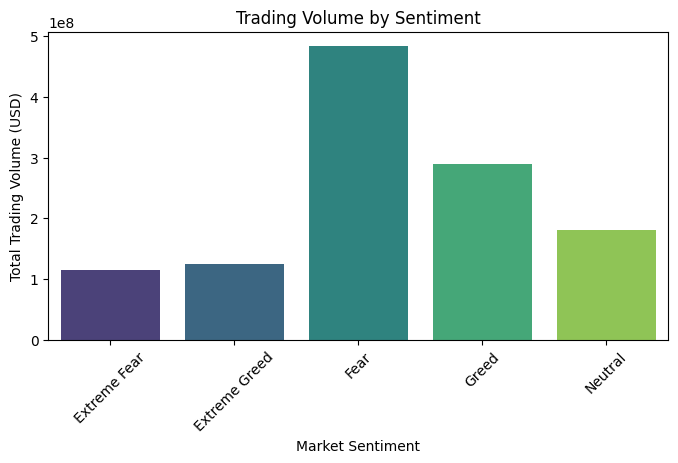

In [68]:
fig, ax1 = plt.subplots(figsize=(8, 4))
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', ax=ax1, palette='viridis')
ax1.set_title('Trading Volume by Sentiment', color='Black')
ax1.set_xlabel('Market Sentiment')
ax1.set_ylabel('Total Trading Volume (USD)')
ax1.tick_params(axis='x', rotation=45, colors='Black')
ax1.tick_params(axis='y', colors='black')

### Average PnL by Sentiment

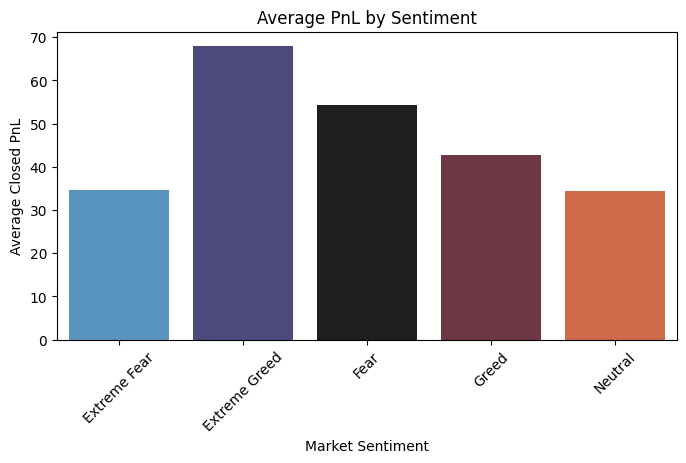

In [69]:
fig, ax2 = plt.subplots(figsize=(8, 4))
sns.barplot(data=pnl_by_sentiment, x='classification', y='Average PnL', ax=ax2, palette='icefire')
ax2.set_title('Average PnL by Sentiment', color='black')
ax2.set_xlabel('Market Sentiment')
ax2.set_ylabel('Average Closed PnL')
ax2.tick_params(axis='x', rotation=45, colors='black')
ax2.tick_params(axis='y', colors='black')

###  Volume Vs Sentiments


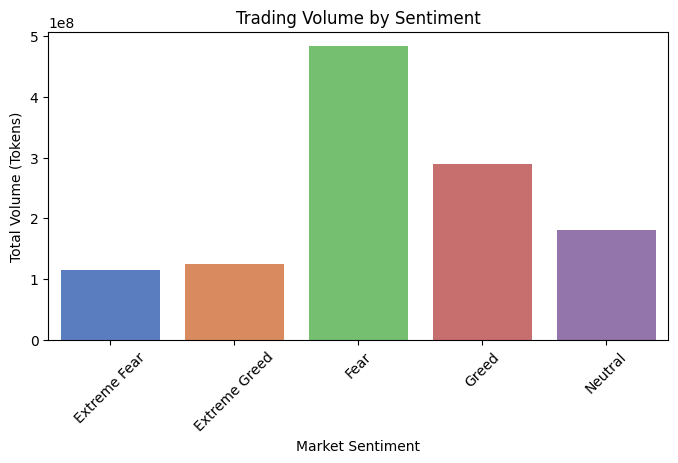

In [93]:
fig, ax4 = plt.subplots(figsize=(8, 4))
sns.barplot(data=volume_by_sentiment, x='classification', y='Size USD', ax=ax4, palette='muted')
ax4.set_title('Trading Volume by Sentiment', color='black')
ax4.set_xlabel('Market Sentiment')
ax4.set_ylabel('Total Volume (Tokens)')
ax4.tick_params(axis='x', rotation=45, colors='black')
ax4.tick_params(axis='y', colors='black')

### Are traders making more money in Fear or Greed?

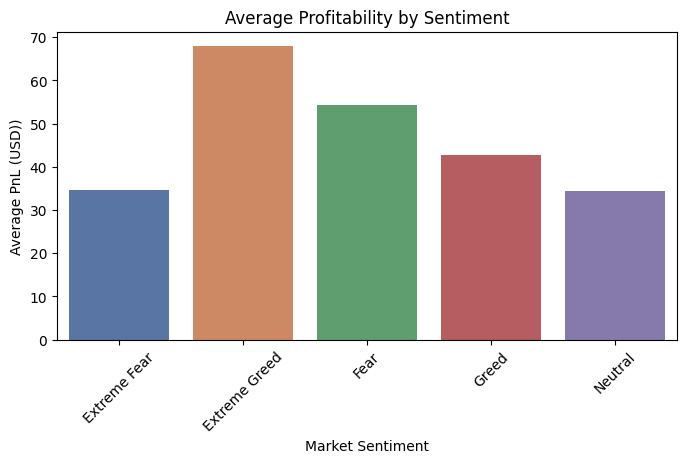

In [71]:
fig, ax5 = plt.subplots(figsize=(8, 4))
sns.barplot(data=pnl_by_sentiment, x='classification', y='Average PnL', ax=ax5, palette='deep')
ax5.set_title('Average Profitability by Sentiment', color='black')
ax5.set_xlabel('Market Sentiment')
ax5.set_ylabel('Average PnL (USD))')
ax5.tick_params(axis='x', rotation=45, colors='black')
ax5.tick_params(axis='y', colors='black')

NOTE- <br>Traders perform best in extreme conditions (especially Extreme Greed)<br>
Extreme Fear and Neutral are risky for traders → profits tend to shrink

### Are traders making bigger trades in “Greed” vs “Fear”?

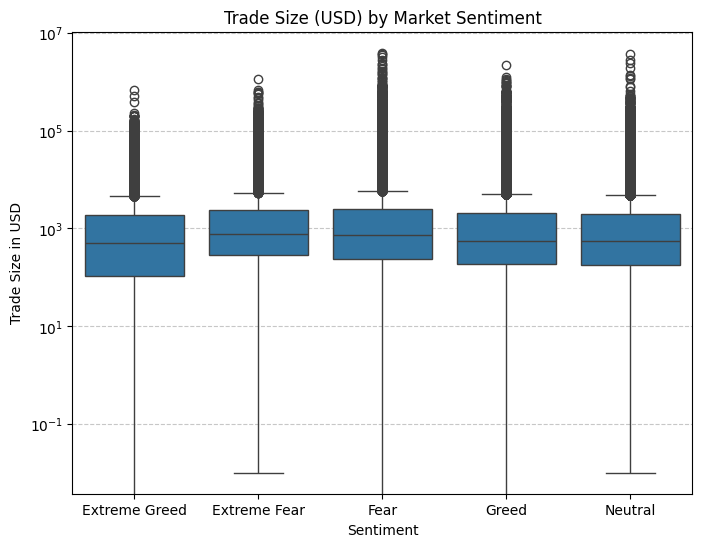

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='classification', y='Size USD', data=market_df)
plt.title("Trade Size (USD) by Market Sentiment")
plt.ylabel("Trade Size in USD")
plt.xlabel("Sentiment")
plt.yscale("log")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NOTE- <br>1. Trade size does not change much between Fear and Greed.<br>2.Both small and large trades exist in all sentiment regimes.

## Traders Vs sentiments
Do traders buy more in greed or in fear?

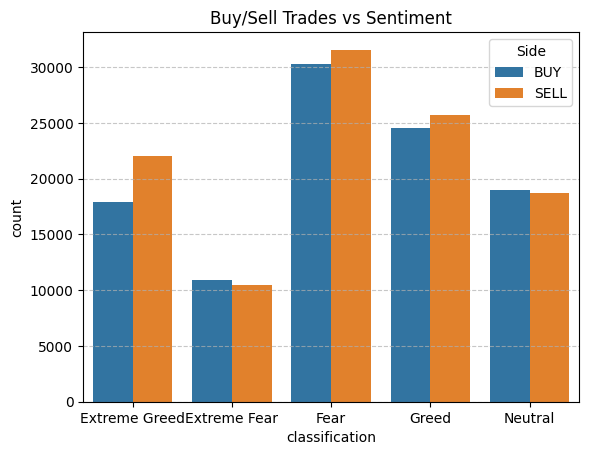

In [73]:
sns.countplot(x='classification', hue='Side', data=market_df)
plt.title("Buy/Sell Trades vs Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NOTE- <br>1. Fear drives the most trading activity, showing markets are most reactive when sentiment is negative.<br>
      2. Extreme Greed → More selling than buying, indicating profit-taking after strong rallies

### Trade Metrics (Advance)

A. Risk Analysis: PnL volatility in Fear vs Greed

In [74]:
risk_analysis = market_df.groupby('classification')['Closed PnL'].std()
print("PnL Volatility by Sentiment:", risk_analysis)

PnL Volatility by Sentiment: classification
Extreme Fear     1136.056091
Extreme Greed     766.828294
Fear              935.355438
Greed            1116.028390
Neutral           517.122220
Name: Closed PnL, dtype: float64


NOTE- <BR>Traders face the highest risk in Extreme Fear and Greed regimes. <BR>Neutral periods are the safest for stable performance, while moderate fear/greed shows intermediate risk

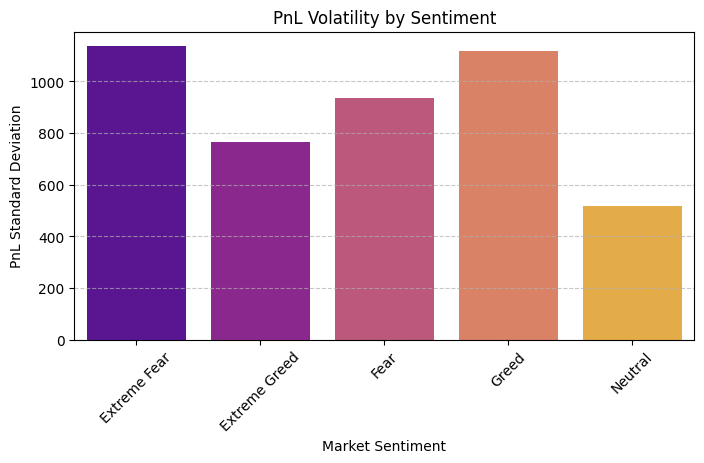

In [75]:
fig, ax3 = plt.subplots(figsize=(8, 4))
sns.barplot(data=pnl_by_sentiment, x='classification', y='PnL Volatility', ax=ax3, palette='plasma')
ax3.set_title('PnL Volatility by Sentiment', color='black')
ax3.set_xlabel('Market Sentiment')
ax3.set_ylabel('PnL Standard Deviation')
ax3.tick_params(axis='x', rotation=45, colors='black')
ax3.tick_params(axis='y', colors='black')
plt.grid(axis='y', linestyle='--', alpha=0.7)

B. Quantify trader performance

In [76]:
def calculate_metric(df):
    metrics = {}
    metrics['total_trades'] = len(df)
    metrics['win_rate'] = (df['Closed PnL'] > 0).mean() #win rate
    metrics['roi'] = df['Closed PnL'].sum() / (df['Execution Price'] * df['Size Tokens']).sum() if (df['Execution Price']*df['Size Tokens']).sum() != 0 else 0 # ROI(total Pnl/total traders)
    metrics['sharpe_ratio'] = df['Closed PnL'].mean() / df['Closed PnL'].std() if df['Closed PnL'].std() != 0 else 0 #Sharpe Ratio (average PnL / standard deviation of PnL)
    metrics['max_drawndown'] = df['Closed PnL'].cumsum().min() #worst cumulative dip in PnL over time
    active_days = df['date_only'].nunique()
    metrics['trades_per_day'] = len(df) / active_days if active_days > 0 else 0#Trades per day (fixed)
    return pd.Series(metrics)

In [77]:
traders_metric.head()

,Account,Avg_Closed_PnL,Volatility,Total_Closed_PnL,Total_Size_USD,Sharpe_Ratio
27,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,145.481748,1374.026402,2.143383e+06,5.654357e+07,0.105880
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768,4692.452329,1.600230e+06,6.169726e+07,0.089320
29,0xbaaaf6571ab7d571043ff1e313a9609a10637864,44.364091,567.762763,9.401638e+05,6.803634e+07,0.078138
13,0x513b8629fe877bb581bf244e326a047b249c4ff1,68.684419,639.402444,8.404226e+05,4.208766e+08,0.107420
31,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,20.806305,264.123880,8.360806e+05,7.410781e+07,0.078775


In [78]:
trader_metric = market_df.groupby(['Account','classification']).apply(calculate_metric).reset_index()
trader_metric.head()

,Account,classification,total_trades,win_rate,roi,sharpe_ratio,max_drawndown,trades_per_day
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Fear,100.0,0.370000,0.082788,0.108304,115287.000000,50.000000
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,945.0,0.066667,-0.003529,-0.033057,-152323.104200,105.000000
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1778.0,0.526434,0.036791,0.133473,32.991000,355.600000
3,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,574.0,0.160279,0.031854,0.068358,-175611.000056,191.333333
4,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421.0,0.581948,0.012789,0.165176,0.000000,84.200000


NOTE-<br> 1. Extreme Fear → Strongest performance(ROI is the highest (8.2%), Win rate is moderate (37%), but still decent)<br>
2. Extreme Greed → Worst performance (ROI is negative (-0.35%), Max Drawdown is very large negative (-152k) → huge losses)<br>
3. Fear → Consistent profitability(Highest number of trades (1,778),Win rate above 50% (52.6%))<br>
4. Greed → Mixed results (ROI is positive (3.1%) but win rate is low (16%),Suggests the trader has few big winners, but most trades are losses)<br>
5. Neutral → Balanced trading( Highest win rate (58%) but small ROI (1.3%),Likely making many small safe trades)

### Correlation Analysis

A. Correlation Between Traders matrics

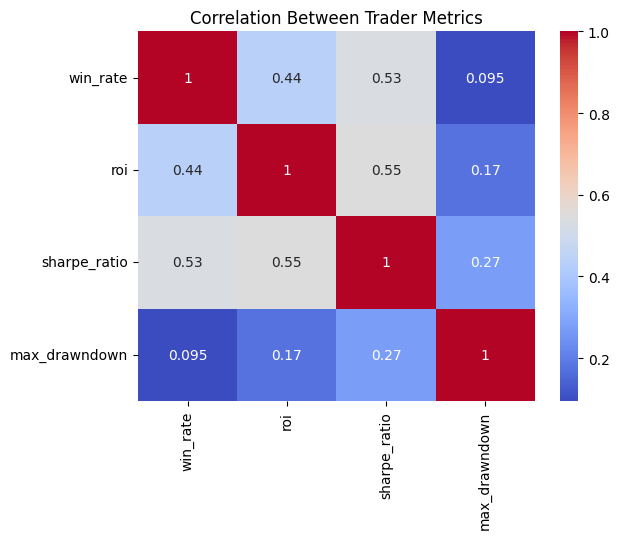

In [79]:
corr_matrix = trader_metric[['win_rate','roi','sharpe_ratio','max_drawndown']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Between Trader Metrics")
plt.show()

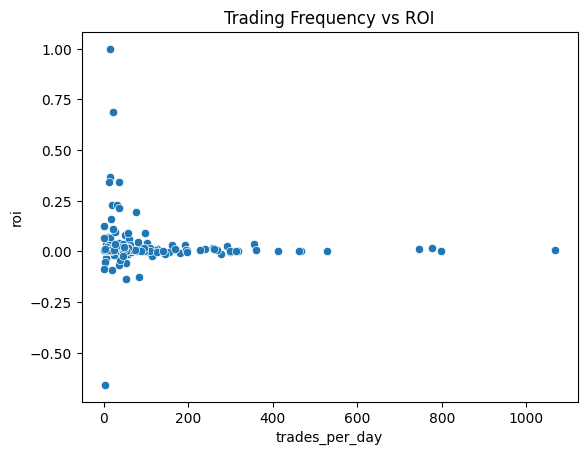

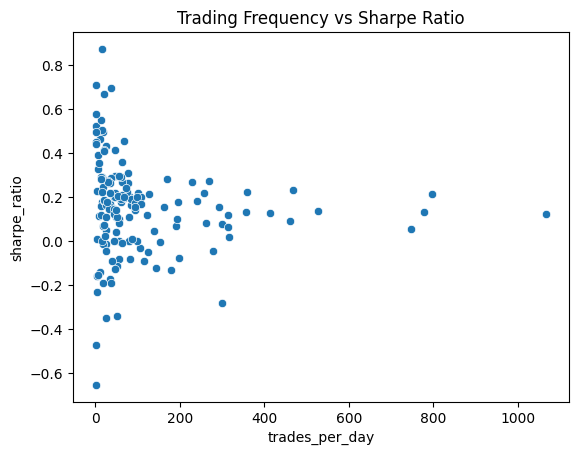

In [80]:
sns.scatterplot(x='trades_per_day', y='roi', data=trader_metric)
plt.title("Trading Frequency vs ROI")
plt.show()

sns.scatterplot(x='trades_per_day', y='sharpe_ratio', data=trader_metric)
plt.title("Trading Frequency vs Sharpe Ratio")
plt.show()

NOTE- <br> 1. Most traders trade moderately; very high-frequency trading shows weak or negative ROI <br>2. Sharpe, suggesting overtrading reduces performance consistency.

### Trader Rankings by Sentiment
Rank traders by ROI along with Sharpe Ratio & Win rate in each sentiment regime

NOTE- <br> Top performers in Extreme Greed had higher ROI but lower Sharpe → risky strategies.<br>Top performers in Fear achieved consistent Sharpe ratios → resilient strategies.

In [81]:
# In all 3 metrics top 5 traders
def top_traders(df, metrics=['roi', 'sharpe_ratio', 'win_rate'], top_n=5):
    rankings = df.groupby('classification').apply(
        lambda x: x.sort_values('roi', ascending=False).head(top_n)[['Account'] + metrics]
    )
    return rankings

In [82]:
rankings = top_traders(trader_metric)
print("Top 5 Traders by ROI (with Sharpe Ratio & Win Rate) for each Sentiment Regime")
display(rankings)

Top 5 Traders by ROI (with Sharpe Ratio & Win Rate) for each Sentiment Regime


Account       roi  \
classification                                                             
Extreme Fear   80   0x72c6a4624e1dffa724e6d00d64ceae698af892a0  0.344307   
               0    0x083384f897ee0f19899168e3b1bec365f52a9012  0.082788   
               40   0x420ab45e0bd8863569a5efbb9c05d91f40624641  0.063390   
               20   0x2c229d22b100a7beb69122eed721cee9b24011dd  0.041142   
               85   0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4  0.023783   
Extreme Greed  46   0x430f09841d65beb3f27765503d0f850b8bce7713  0.999997   
               71   0x6d6a4b953f202f8df5bed40692e7fd865318264a  0.690407   
               135  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  0.214143   
               121  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0  0.111033   
               26   0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891  0.068956   
Fear           82   0x72c6a4624e1dffa724e6d00d64ceae698af892a0  0.228753   
               42   0x420ab45e0bd8863569a5efbb9c05d91f40624641  0.161396   
               2    0x083384f897ee0f19899168e3b1bec365f52a9012  0.036791   
               97   0x8170715b3b381dffb7062c0298972d4727a0a63b  0.036278   
               127  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  0.027675   
Greed          123  0xa520ded057a32086c40e7dd6ed4eb8efb82c00e0  0.344844   
               73   0x6d6a4b953f202f8df5bed40692e7fd865318264a  0.227184   
               48   0x430f09841d65beb3f27765503d0f850b8bce7713  0.193793   
               128  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  0.090143   
               78   0x72743ae2822edd658c0c50608fd7c5c501b2afbd  0.089827   
Neutral        44   0x420ab45e0bd8863569a5efbb9c05d91f40624641  0.366279   
               39   0x3f9a0aadc7f04a7c9d75dc1b5a6ddd6e36486cf6  0.125820   
               49   0x430f09841d65beb3f27765503d0f850b8bce7713  0.094203   
               138  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  0.044274   
               74   0x6d6a4b953f202f8df5bed40692e7fd865318264a  0.033600   

                    sharpe_ratio  win_rate  
classification                              
Extreme Fear   80       0.284229  0.420814  
               0        0.108304  0.370000  
               40       0.176936  0.049180  
               20       0.693865  0.687500  
               85       0.210803  0.914557  
Extreme Greed  46       0.872870  1.000000  
               71       0.413353  0.894737  
               135      0.217657  0.510043  
               121      0.408940  0.519531  
               26       0.225094  0.459627  
Fear           82       0.273060  0.645012  
               42       0.288689  0.357143  
               2        0.133473  0.526434  
               97       0.199596  0.296848  
               127      0.265534  0.349593  
Greed          123      0.292650  0.953704  
               73       0.667098  0.506224  
               48       0.262148  0.637306  
               128      0.294766  0.447059  
               78       0.201696  0.317032  
Neutral        44       0.503090  0.520833  
               39       0.707107  0.500000  
               49       0.430701  0.507463  
               138      0.106936  0.378073  
               74       0.464073  0.377049

## Top 10 Traders by Total Closed PnL

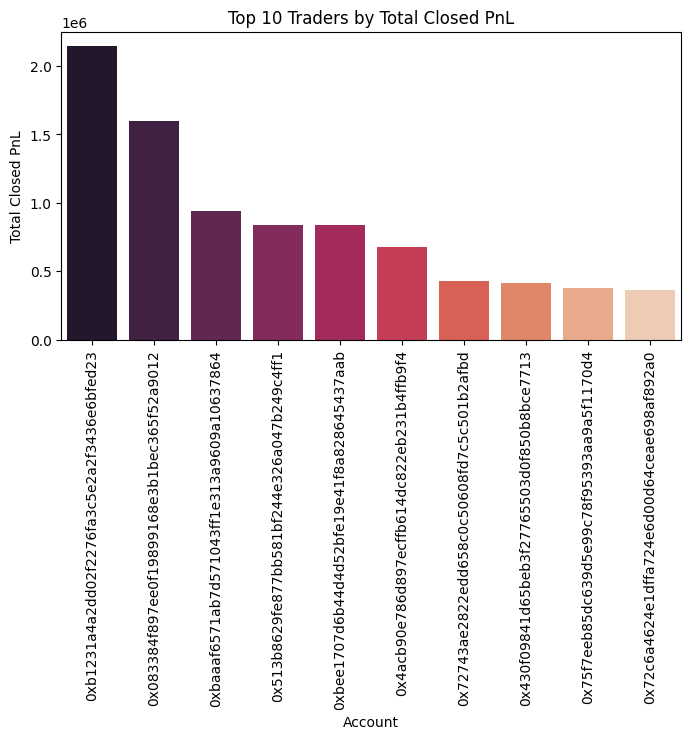

In [83]:
fig, ax6 = plt.subplots(figsize=(8, 4))
top_traders = traders_metric.nlargest(10, 'Total_Closed_PnL')
sns.barplot(data=top_traders, x='Account', y='Total_Closed_PnL', ax=ax6, palette='rocket')
ax6.set_title('Top 10 Traders by Total Closed PnL', color='black')
ax4.set_xlabel('Trader Account')
ax6.set_ylabel('Total Closed PnL')
ax6.tick_params(axis='x', rotation=90, colors='black')
ax6.tick_params(axis='y', colors='black')


### CONCLUSION

 1. Trading Volume and Market Sentiment <br> Trading volume has a strong positive correlation with market sentiment, meaning traders are most active during periods of bullishness.<BR>
2. Trader Behavior and Performance <br>Traders tend to take on larger, riskier positions during bullish markets, which leads to higher average returns but also greater volatility.<br> The average trade size is higher during Greed periods than Fear periods,
Average Return on Investment (ROI) is higher during Greed periods.<br>